In [2]:
# Import the necessary files
import pandas as pd

In [3]:
# Read the tables
tables = pd.read_html("https://en.wikipedia.org/wiki/1500_metres_world_record_progression")
table = tables[1]

In [4]:
# Demonstrate how tables look like with indices etc

In [5]:
# Read times and dates from one table only
# Pre-coded example
times=table['Time']
dates=table['Date']
dates = pd.to_datetime(dates)
dates.max()-dates.min()

Timedelta('31447 days 00:00:00')

In [32]:
# Pick one record set
import numpy as np
#import datetime
n_records = len(times)-10
years = np.zeros(n_records) # create zero years
seconds = np.zeros(n_records) # create zero years
for i in range(n_records):   
    years[i] = dates[i].date().year
    tmp = times[i].replace("+","0").split(':')
    seconds[i] = float(tmp[0])*60+float(tmp[1])

(1910.0, 2000.0, 200.0, 240.0)

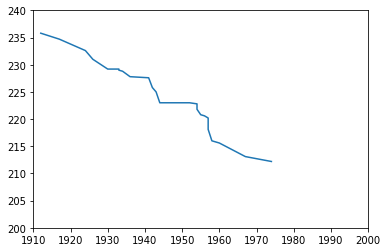

In [33]:
import matplotlib.pyplot as plt
plt.plot(years, seconds)
plt.axis([1910, 2000, 200, 240])

In [ ]:
date.year

0      3:55.8
1      3:54.7
2      3:52.6
3      3:51.0
4      3:49.2
5      3:49.2
6      3:49.0
7      3:48.8
8      3:47.8
9      3:47.6
10     3:45.8
11     3:45.0
12     3:43.0
13     3:43.0
14     3:43.0
15    3:42.8+
16    3:41.8+
17     3:40.8
18     3:40.8
19     3:40.8
20     3:40.6
21     3:40.2
22     3:40.2
23     3:38.1
24     3:36.0
25     3:35.6
26     3:33.1
27     3:32.2
28     3:32.1
29     3:32.1
30     3:31.4
31    3:31.24
32    3:30.77
33    3:29.67
34    3:29.46
35    3:28.86
36    3:27.37
37    3:26.00
Name: Time, dtype: object